# 데이터 준비

In [1]:
!rm -rf *.zip
!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip

--2022-01-13 04:01:39--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.96.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  --.-KB/s    in 0.08s   

2022-01-13 04:01:39 (160 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]



In [2]:
!rm -rf *.csv
!unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


# 데이터 로딩

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("jena_climate_2009_2016.csv")

In [5]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [6]:
print(len(df))

420551


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB
None


# 살펴보기

Date Time
p (mbar)


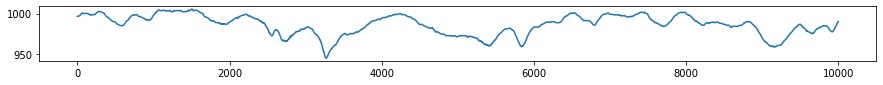

T (degC)


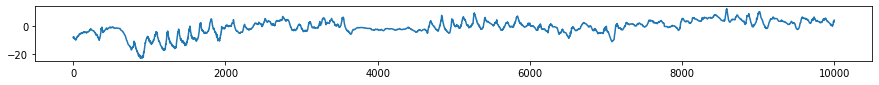

Tpot (K)


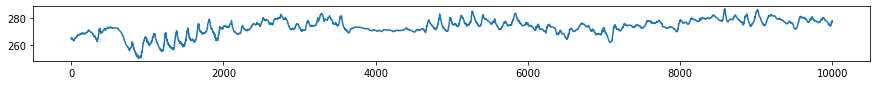

Tdew (degC)


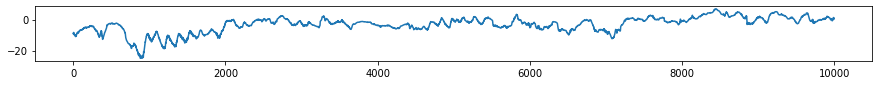

rh (%)


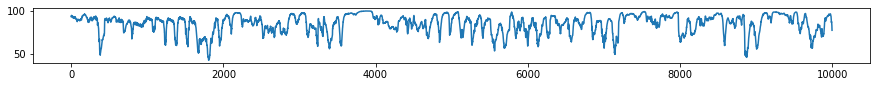

VPmax (mbar)


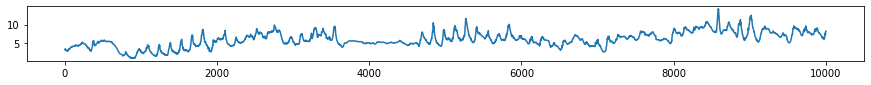

VPact (mbar)


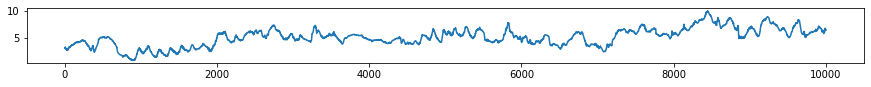

VPdef (mbar)


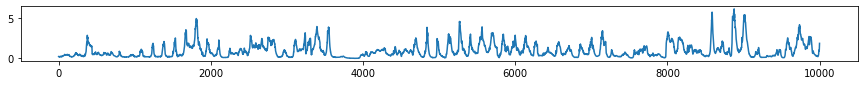

sh (g/kg)


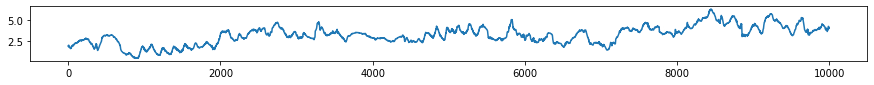

H2OC (mmol/mol)


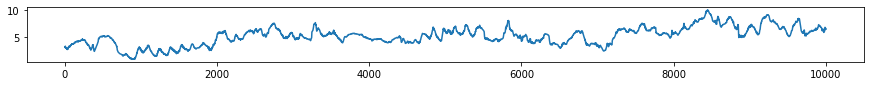

rho (g/m**3)


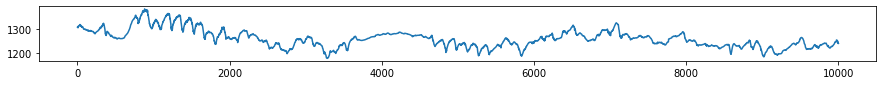

wv (m/s)


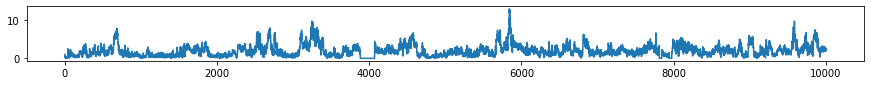

max. wv (m/s)


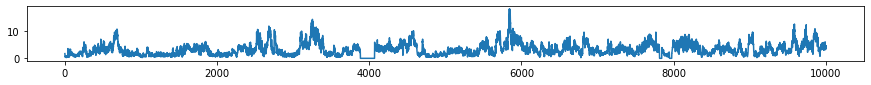

wd (deg)


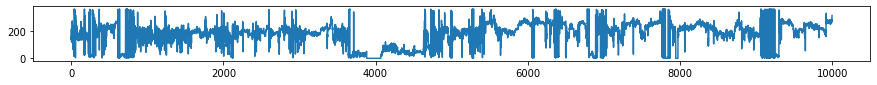

In [8]:
for column in df.columns:
    print(column)
    if column=="Date Time": continue
    plt.figure(figsize=(15,1))
    plt.plot(df[column][:10000])
    plt.show()

Date Time
p (mbar)


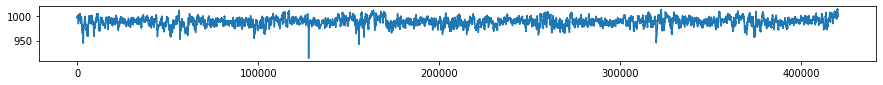

T (degC)


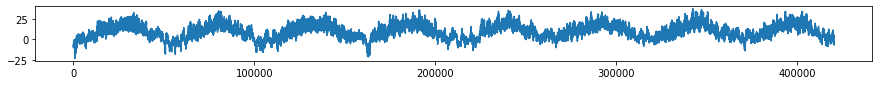

Tpot (K)


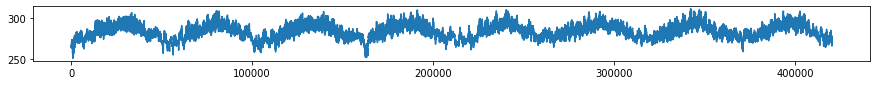

Tdew (degC)


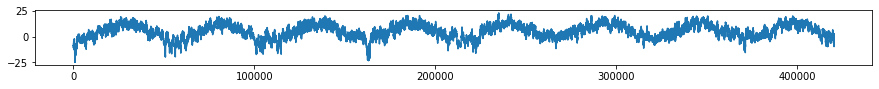

rh (%)


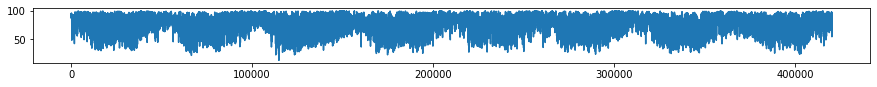

VPmax (mbar)


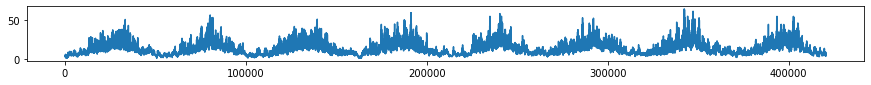

VPact (mbar)


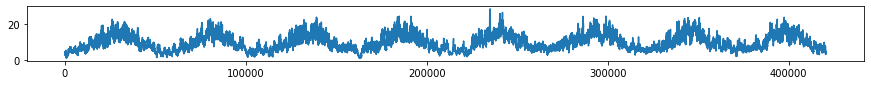

VPdef (mbar)


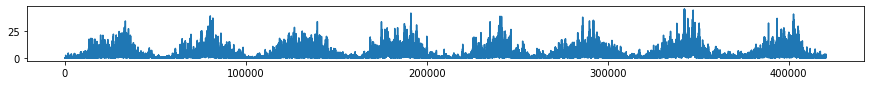

sh (g/kg)


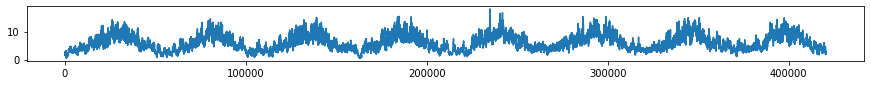

H2OC (mmol/mol)


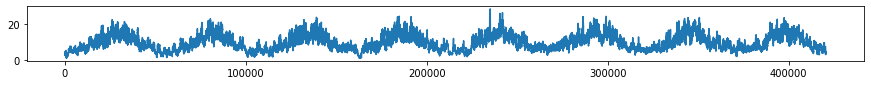

rho (g/m**3)


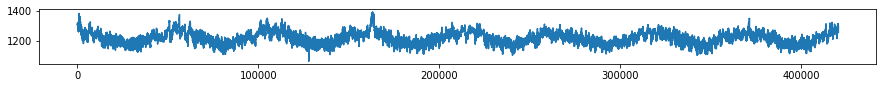

wv (m/s)


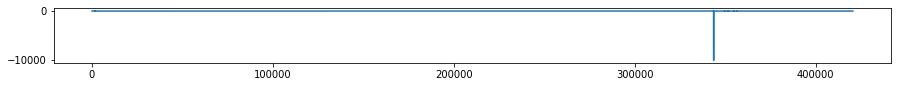

max. wv (m/s)


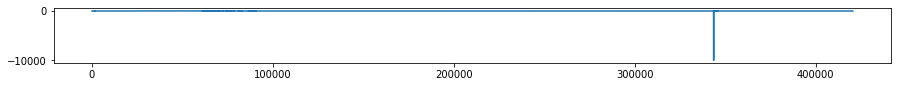

wd (deg)


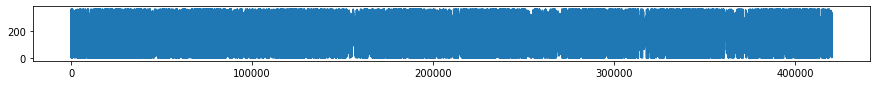

In [9]:
for column in df.columns:
    print(column)
    if column=="Date Time": continue
    plt.figure(figsize=(15,1))
    plt.plot(df[column])
    plt.show()

Date Time
p (mbar)


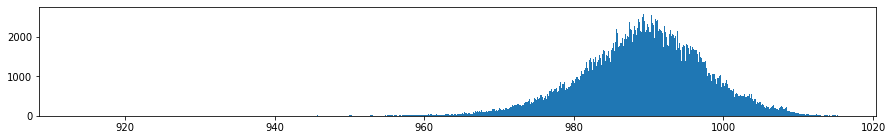

T (degC)


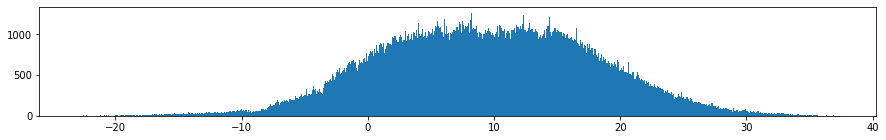

Tpot (K)


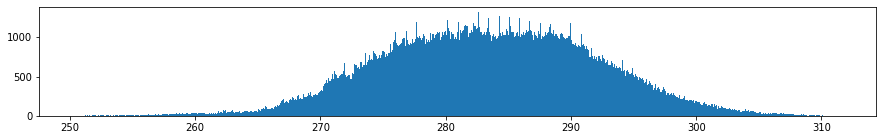

Tdew (degC)


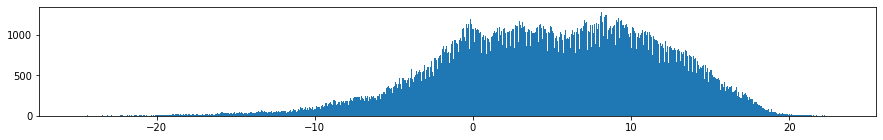

rh (%)


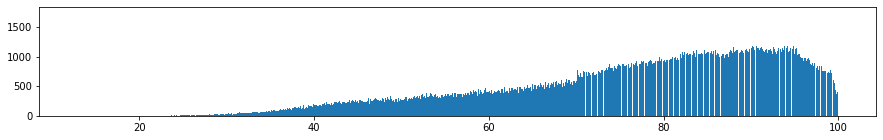

VPmax (mbar)


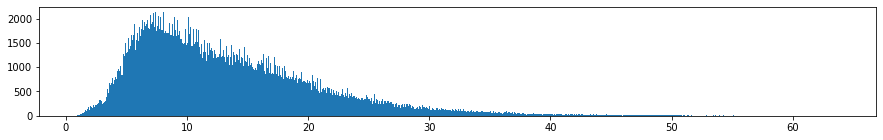

VPact (mbar)


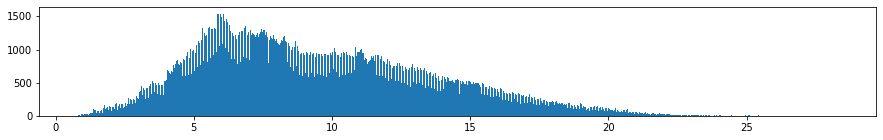

VPdef (mbar)


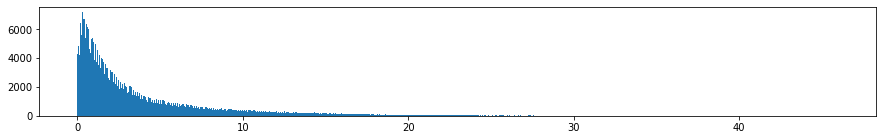

sh (g/kg)


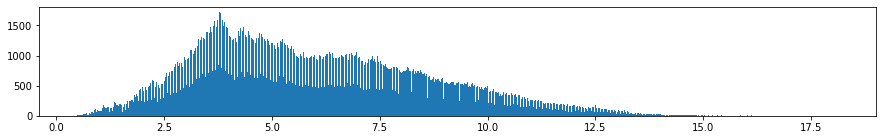

H2OC (mmol/mol)


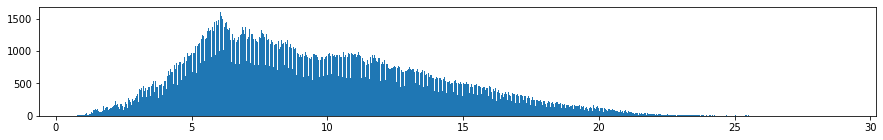

rho (g/m**3)


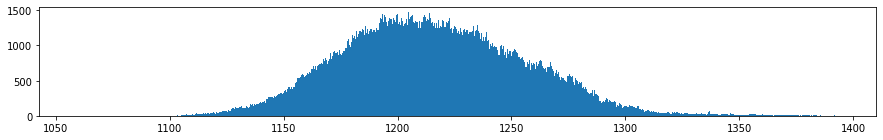

wv (m/s)


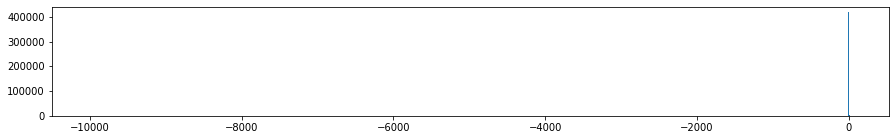

max. wv (m/s)


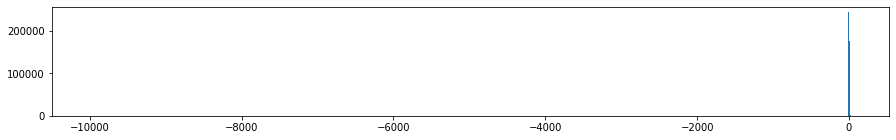

wd (deg)


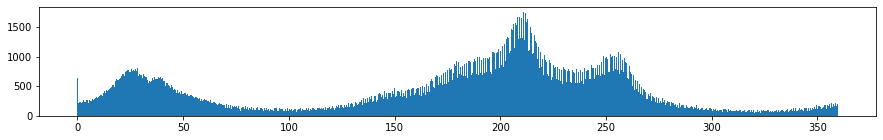

In [10]:
for column in df.columns:
    print(column)
    if column=="Date Time": continue
    plt.figure(figsize=(15,2))
    plt.hist(df[column], bins=1000)
    plt.show()

# Date 컬럼 삭제

In [11]:
df = df.drop(columns="Date Time")

In [12]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


# 이상치 처리

In [13]:
outlier_min = {
    'p (mbar)': 950,
    "wv (m/s)": 0,
    "max. wv (m/s)" : 0,
}

p (mbar)


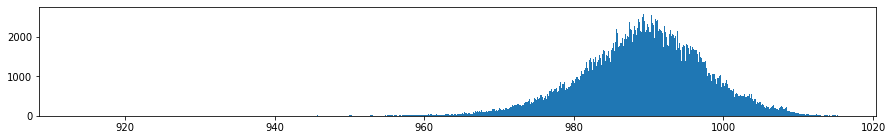

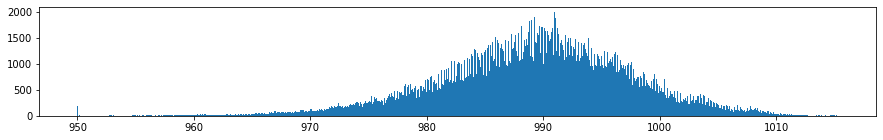

wv (m/s)


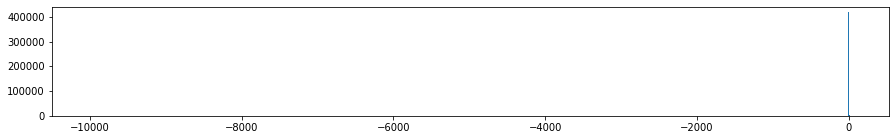

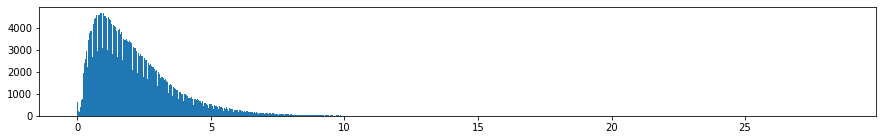

max. wv (m/s)


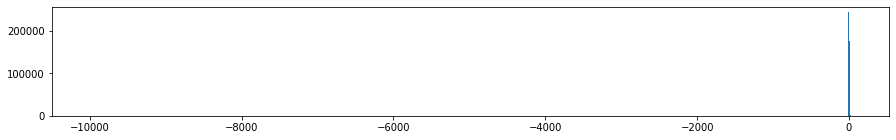

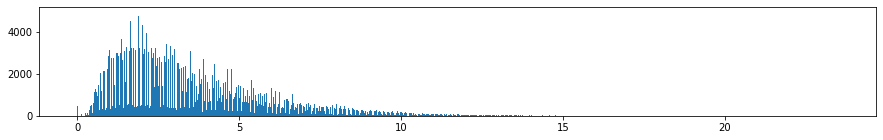

In [14]:
for column, limit in outlier_min.items():
    print(column)
    plt.figure(figsize=(15,2))
    plt.hist(df[column], bins=1000)
    plt.show()

    df.loc[df[column]<limit, column] = limit
    
    plt.figure(figsize=(15,2))
    plt.hist(df[column], bins=1000)
    plt.show()


In [15]:
outlier_max = {
    "wv (m/s)": 10,
    "max. wv (m/s)" : 15,
}

wv (m/s)


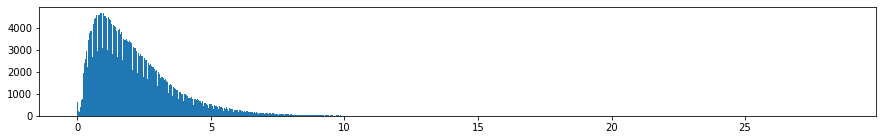

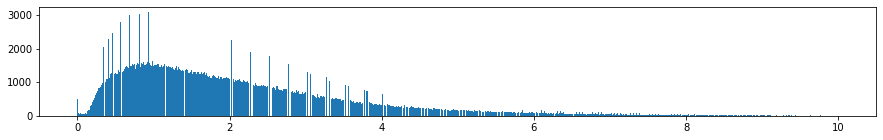

max. wv (m/s)


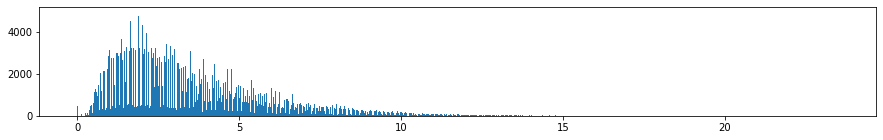

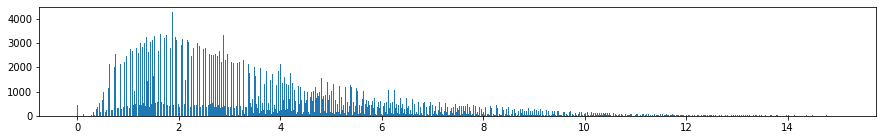

In [16]:
for column, limit in outlier_max.items():
    print(column)
    plt.figure(figsize=(15,2))
    plt.hist(df[column], bins=1000)
    plt.show()

    df.loc[df[column]>limit, column] = limit
    
    plt.figure(figsize=(15,2))
    plt.hist(df[column], bins=1000)
    plt.show()


# Normalization

In [17]:
raw_data = df.to_numpy()

In [18]:
maxs = raw_data.max(axis=0)
print(maxs)
mins = raw_data.min(axis=0)
print(mins)

[1015.35   37.28  311.34   23.11  100.     63.77   28.32   46.01   18.13
   28.82 1393.54   10.     15.    360.  ]
[ 9.50000e+02 -2.30100e+01  2.50600e+02 -2.50100e+01  1.29500e+01
  9.50000e-01  7.90000e-01  0.00000e+00  5.00000e-01  8.00000e-01
  1.05945e+03  0.00000e+00  0.00000e+00  0.00000e+00]


In [19]:
normalized = (raw_data - mins) / (maxs - mins)
print(normalized[:5])

[[0.71185922 0.24863161 0.24366151 0.33478803 0.92303274 0.03788602
  0.0842717  0.00478157 0.08167896 0.082798   0.74321291 0.103
  0.11666667 0.42305556]
 [0.71262433 0.24216288 0.2372407  0.32689111 0.9241815  0.03629417
  0.08100254 0.00456423 0.07884288 0.07958601 0.74934898 0.072
  0.1        0.37805556]
 [0.71201224 0.24050423 0.23559434 0.32626766 0.92992533 0.0359758
  0.0806393  0.00434688 0.07827567 0.07922912 0.75066599 0.019
  0.042      0.47666667]
 [0.7117062  0.24382153 0.2390517  0.3312552  0.93337163 0.03677173
  0.08281874 0.00412954 0.08054453 0.08137045 0.74752312 0.034
  0.03333333 0.55      ]
 [0.7117062  0.24448499 0.2395456  0.33187864 0.93222286 0.03693091
  0.08318198 0.00412954 0.08054453 0.08172734 0.74695441 0.032
  0.042      0.59527778]]


In [20]:
preprocessed = normalized

In [21]:
print(preprocessed.shape)

(420551, 14)


# 다중 예측

## Data Generator

In [22]:
SEQUENCE_LENGTH = 6*24*7
OFFSET = 6*24*1
BATCH_SIZE = 32

In [23]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):

    def __init__(self, numbers, 
                 sequence_length=SEQUENCE_LENGTH, 
                 offset=OFFSET, 
                 batch_size=BATCH_SIZE, 
                 shuffle=True,
                 validation_split=0.0,
                 test_split=0.0,
                 indexes=None,
                 max_size=None):
        self.numbers = numbers
        self.sequence_length = sequence_length
        self.offset = offset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes, self.valid_indexes, self.test_indexes = self._prepare_indexes(validation_split, test_split, indexes, max_size)

    def __len__(self):
        return int(np.floor(len(self.indexes) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        return self._generate_data(indexes)

    def on_epoch_end(self):
        self._shuffle_index()

    def _prepare_indexes(self, validation_split, test_split, indexes, max_size):
        if indexes is not None:
            return indexes, None, None

        data_count = len(self.numbers) - (self.sequence_length+self.offset) + 1
        all_index = np.arange(data_count)
        np.random.shuffle(all_index)
        if max_size is not None:
            all_index = all_index[:max_size]

        if validation_split+test_split==0.0:
            return all_index, None, None

        valid_i = int(len(all_index)*(1-validation_split-test_split))
        test_i = int(len(all_index)*(1-test_split))

        return all_index[:valid_i], all_index[valid_i:test_i], all_index[test_i:]
        
    def _shuffle_index(self):
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def _generate_data(self, indexes):
        X = np.empty((len(indexes), self.sequence_length, self.numbers.shape[-1]))
        Y = np.empty((len(indexes), self.numbers.shape[-1]))

        for i, index in enumerate(indexes):
            X[i] = self.numbers[index:index+self.sequence_length]
            Y[i] = self.numbers[index+self.sequence_length+self.offset-1]
        return X, Y

    def get_all_data(self):
        return self._generate_data(self.indexes)        

    def subset(self, type):
        if type=="train":
            return DataGenerator(self.numbers, indexes=self.indexes)
        elif type=="validation" or type=="valid":
            return DataGenerator(self.numbers, indexes=self.valid_indexes)
        elif type=="test":
            return DataGenerator(self.numbers, indexes=self.test_indexes)
        else:
            print("invalid type {}".format(type))

In [25]:
data_generator = DataGenerator(preprocessed, validation_split=0.1, test_split=0.1, max_size=10000)
train_data_generator = data_generator.subset("train")
valid_data_generator = data_generator.subset("valid")
test_data_generator = data_generator.subset("test")

batch_x, batch_y = train_data_generator.__getitem__(0)
print(batch_x.shape)
print(batch_y.shape)
print(batch_x[0])
print(batch_y[0])

print(len(preprocessed)-(SEQUENCE_LENGTH+OFFSET)+1)
print(len(train_data_generator.indexes))
print(len(valid_data_generator.indexes))
print(len(test_data_generator.indexes))

(32, 1008, 14)
(32, 14)
[[0.65478194 0.50920551 0.50757326 ... 0.124      0.128      0.54388889]
 [0.65462892 0.50986897 0.50823181 ... 0.117      0.10933333 0.51722222]
 [0.6530987  0.50986897 0.50839644 ... 0.085      0.10133333 0.51944444]
 ...
 [0.50788064 0.4997512  0.51103062 ... 0.076      0.12266667 0.33833333]
 [0.50849273 0.5102007  0.5214027  ... 0.065      0.096      0.18108333]
 [0.510329   0.53342179 0.54445176 ... 0.179      0.34733333 0.80944444]]
[0.60122418 0.41648698 0.41998683 0.55756442 0.9770247  0.09805794
 0.22448238 0.00304282 0.22064663 0.22269807 0.56646413 0.162
 0.13866667 0.65583333]
419400
8000
1000
1000


## 모델 학습

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               73216     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 14)                154       
                                                                 
Total params: 74,660
Trainable params: 74,660
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
250/250 [==============================] - 19s 55ms/step - loss: 0.0338 - mape: 128824.8125 - val_loss: 0.0172 - val_mape: 46567.4961
Epoch 2/10
250/250 [===================

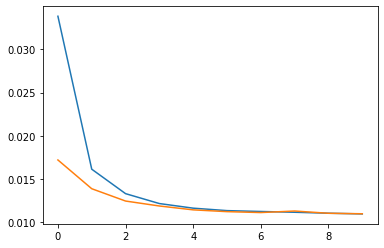

31/31 [==============================] - 1s 23ms/step - loss: 0.0112 - mape: 129384.8516
loss= 0.011170534417033195
mape= 129384.8515625


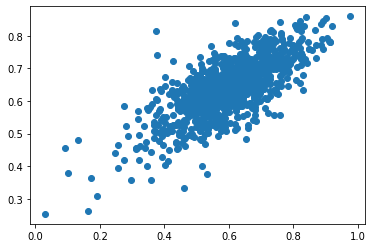

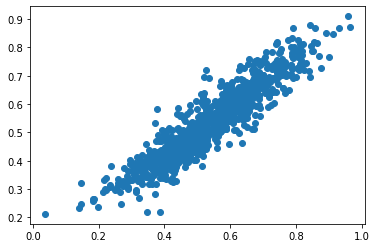

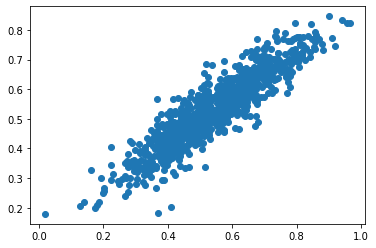

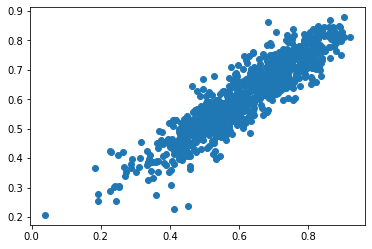

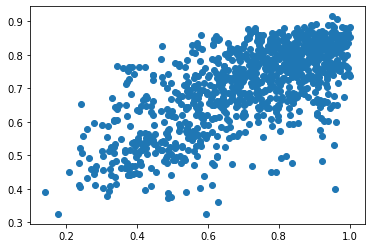

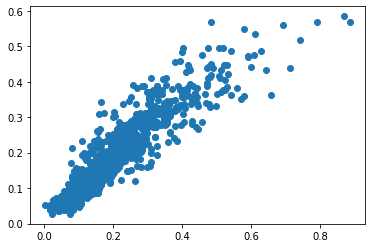

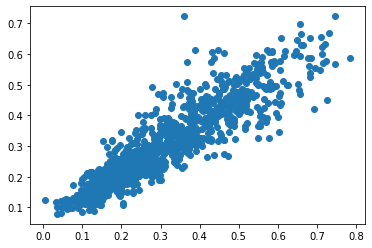

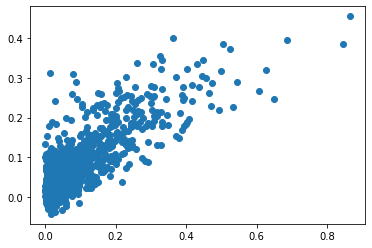

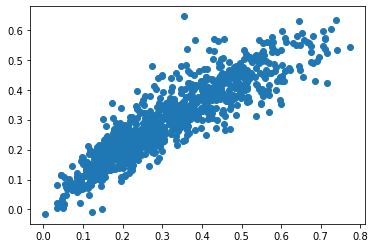

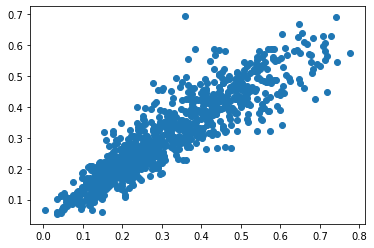

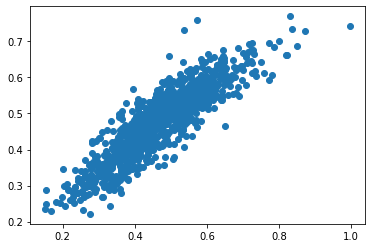

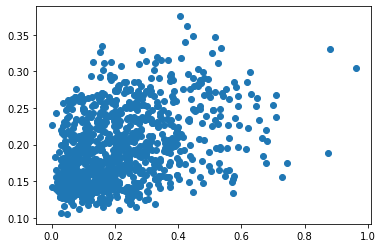

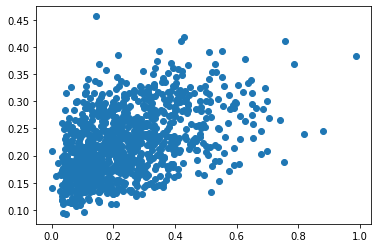

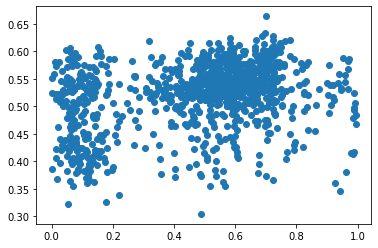

In [27]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Input

input_shape = (SEQUENCE_LENGTH, preprocessed.shape[-1])
output_shape = preprocessed.shape[-1]

model = keras.Sequential()
model.add(Input(input_shape))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_data_generator, epochs=10, verbose=1, validation_data=valid_data_generator)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_data_generator)
print("loss=", loss)
print("mape=", mape)


batch_x, batch_y = test_data_generator.get_all_data()
y_ = model.predict(batch_x).squeeze()
for i in range(output_shape):
    plt.scatter(batch_y[:,i], y_[:,i])
    plt.show()

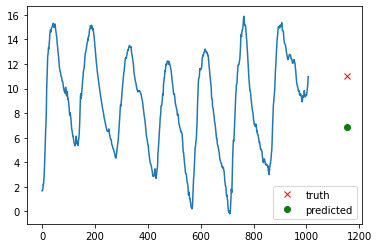

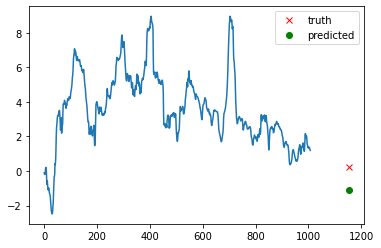

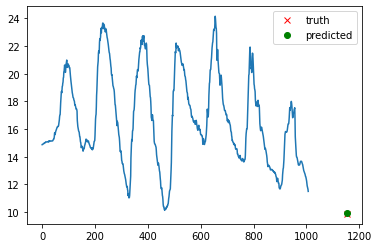

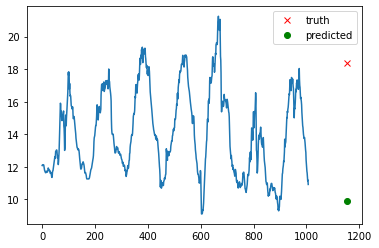

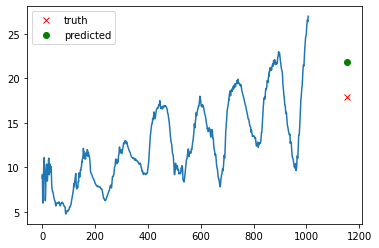

In [ ]:
TARGET_FEATURE = "T (degC)"
TARGET_FEATURE_INDEX = df.columns.get_loc(TARGET_FEATURE)

I = TARGET_FEATURE_INDEX
features = batch_x * (maxs - mins) + mins
truth = batch_y * (maxs - mins) + mins
predicted = y_ * (maxs - mins) + mins


for i in range(5):
  plt.plot(features[i,:,I])
  plt.plot([SEQUENCE_LENGTH+OFFSET], truth[i,I], 'rx', label="truth")
  plt.plot([SEQUENCE_LENGTH+OFFSET], predicted[i,I], 'go', label="predicted")
  plt.legend()
  plt.show()



# 단일 예측

## Data Generator

In [30]:
SEQUENCE_LENGTH = 6*24*7
OFFSET = 6*24*1
BATCH_SIZE = 32

In [31]:
TARGET_FEATURE = "T (degC)"
TARGET_FEATURE_INDEX = df.columns.get_loc(TARGET_FEATURE)
print(TARGET_FEATURE_INDEX)

1


In [32]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):

    def __init__(self, numbers, 
                 sequence_length=SEQUENCE_LENGTH, 
                 offset=OFFSET, 
                 batch_size=BATCH_SIZE, 
                 shuffle=True,
                 validation_split=0.0,
                 test_split=0.0,
                 indexes=None,
                 max_size=None):
        self.numbers = numbers
        self.sequence_length = sequence_length
        self.offset = offset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes, self.valid_indexes, self.test_indexes = self._prepare_indexes(validation_split, test_split, indexes, max_size)

    def __len__(self):
        return int(np.floor(len(self.indexes) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        return self._generate_data(indexes)

    def on_epoch_end(self):
        self._shuffle_index()

    def _prepare_indexes(self, validation_split, test_split, indexes, max_size):
        if indexes is not None:
            return indexes, None, None

        data_count = len(self.numbers) - (self.sequence_length+self.offset) + 1
        all_index = np.arange(data_count)
        np.random.shuffle(all_index)
        if max_size is not None:
            all_index = all_index[:max_size]

        if validation_split+test_split==0.0:
            return all_index, None, None

        valid_i = int(len(all_index)*(1-validation_split-test_split))
        test_i = int(len(all_index)*(1-test_split))

        return all_index[:valid_i], all_index[valid_i:test_i], all_index[test_i:]
        
    def _shuffle_index(self):
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def _generate_data(self, indexes):
        X = np.empty((len(indexes), self.sequence_length, self.numbers.shape[-1]))
        # Y = np.empty((len(indexes), self.numbers.shape[-1]))
        Y = np.empty((len(indexes), ))

        for i, index in enumerate(indexes):
            X[i] = self.numbers[index:index+self.sequence_length]
            # Y[i] = self.numbers[index+self.sequence_length+self.offset-1]
            Y[i] = self.numbers[index+self.sequence_length+self.offset-1,TARGET_FEATURE_INDEX]
        return X, Y

    def get_all_data(self):
        return self._generate_data(self.indexes)        

    def subset(self, type):
        if type=="train":
            return DataGenerator(self.numbers, indexes=self.indexes)
        elif type=="validation" or type=="valid":
            return DataGenerator(self.numbers, indexes=self.valid_indexes)
        elif type=="test":
            return DataGenerator(self.numbers, indexes=self.test_indexes)
        else:
            print("invalid type {}".format(type))

In [33]:
data_generator = DataGenerator(preprocessed, validation_split=0.1, test_split=0.1, max_size=10000)
train_data_generator = data_generator.subset("train")
valid_data_generator = data_generator.subset("valid")
test_data_generator = data_generator.subset("test")

batch_x, batch_y = train_data_generator.__getitem__(0)
print(batch_x.shape)
print(batch_y.shape)
print(batch_x[0])
print(batch_y[0])

print(len(preprocessed)-(SEQUENCE_LENGTH+OFFSET)+1)
print(len(train_data_generator.indexes))
print(len(valid_data_generator.indexes))
print(len(test_data_generator.indexes))

(32, 1008, 14)
(32,)
[[0.50573833 0.56062365 0.571946   ... 0.136      0.14666667 0.50083333]
 [0.50512624 0.55465251 0.5660191  ... 0.112      0.128      0.51972222]
 [0.50849273 0.55067175 0.56173856 ... 0.16       0.17866667 0.60861111]
 ...
 [0.71951033 0.47337867 0.46641422 ... 0.041      0.05866667 0.42972222]
 [0.71905126 0.4737104  0.4667435  ... 0.063      0.08266667 0.34222222]
 [0.71905126 0.47288107 0.46592032 ... 0.031      0.06133333 0.00513889]]
0.47835461933985735
419400
8000
1000
1000


## 모델 학습

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               73216     
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 74,517
Trainable params: 74,517
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
250/250 [==============================] - 15s 55ms/step - loss: 0.0061 - mape: 10.8934 - val_loss: 0.0030 - val_mape: 8.6811
Epoch 2/10
250/250 [=========================

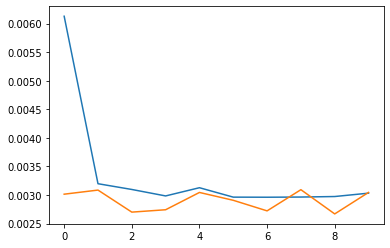

31/31 [==============================] - 1s 24ms/step - loss: 0.0030 - mape: 8.6667
loss= 0.0029850411228835583
mape= 8.666693687438965


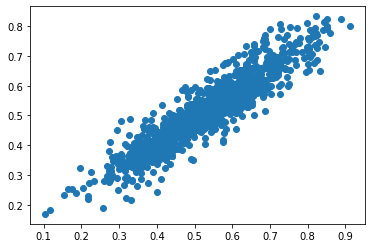

In [34]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Input

input_shape = (SEQUENCE_LENGTH, preprocessed.shape[-1])
# output_shape = preprocessed.shape[-1]
output_shape = 1

model = keras.Sequential()
model.add(Input(input_shape))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_data_generator, epochs=10, verbose=1, validation_data=valid_data_generator)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_data_generator)
print("loss=", loss)
print("mape=", mape)


batch_x, batch_y = test_data_generator.get_all_data()
y_ = model.predict(batch_x).squeeze()
# for i in range(output_shape):
#     plt.scatter(batch_y[:,i], y_[:,i])
#     plt.show()
plt.scatter(batch_y, y_)
plt.show()    

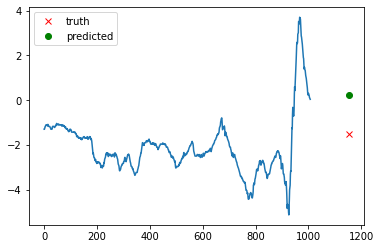

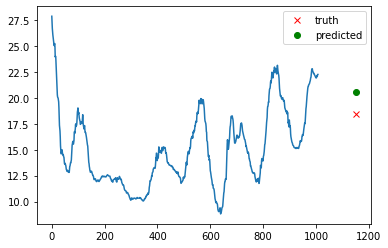

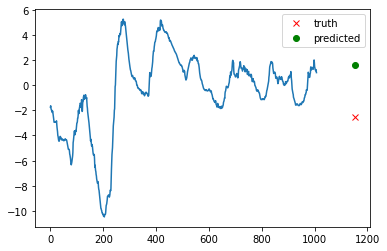

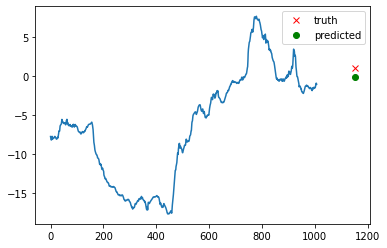

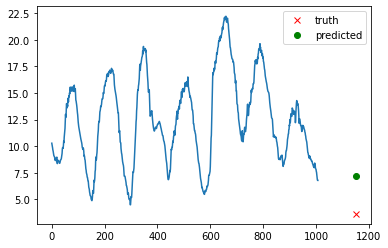

In [35]:
I = TARGET_FEATURE_INDEX
features = batch_x * (maxs[I] - mins[I]) + mins[I]
truth = batch_y * (maxs[I] - mins[I]) + mins[I]
predicted = y_ * (maxs[I] - mins[I]) + mins[I]

for i in range(5):
  plt.plot(features[i,:,I])
  plt.plot([SEQUENCE_LENGTH+OFFSET], truth[i], 'rx', label="truth")
  plt.plot([SEQUENCE_LENGTH+OFFSET], predicted[i], 'go', label="predicted")
  plt.legend()
  plt.show()



# 분류

## Data Generator

In [36]:
SEQUENCE_LENGTH = 6*24*7
OFFSET = 6*24*1
BATCH_SIZE = 32

In [37]:
TARGET_FEATURE = "T (degC)"
TARGET_FEATURE_INDEX = df.columns.get_loc(TARGET_FEATURE)
print(TARGET_FEATURE_INDEX)

1


In [38]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):

    def __init__(self, numbers, 
                 sequence_length=SEQUENCE_LENGTH, 
                 offset=OFFSET, 
                 batch_size=BATCH_SIZE, 
                 shuffle=True,
                 validation_split=0.0,
                 test_split=0.0,
                 indexes=None,
                 max_size=None):
        self.numbers = numbers
        self.sequence_length = sequence_length
        self.offset = offset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes, self.valid_indexes, self.test_indexes = self._prepare_indexes(validation_split, test_split, indexes, max_size)

    def __len__(self):
        return int(np.floor(len(self.indexes) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        return self._generate_data(indexes)

    def on_epoch_end(self):
        self._shuffle_index()

    def _prepare_indexes(self, validation_split, test_split, indexes, max_size):
        if indexes is not None:
            return indexes, None, None

        data_count = len(self.numbers) - (self.sequence_length+self.offset) + 1
        all_index = np.arange(data_count)
        np.random.shuffle(all_index)
        if max_size is not None:
            all_index = all_index[:max_size]

        if validation_split+test_split==0.0:
            return all_index, None, None

        valid_i = int(len(all_index)*(1-validation_split-test_split))
        test_i = int(len(all_index)*(1-test_split))

        return all_index[:valid_i], all_index[valid_i:test_i], all_index[test_i:]
        
    def _shuffle_index(self):
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def _generate_data(self, indexes):
        X = np.empty((len(indexes), self.sequence_length, self.numbers.shape[-1]))
        # Y = np.empty((len(indexes), self.numbers.shape[-1]))
        Y = np.empty((len(indexes), ))

        for i, index in enumerate(indexes):
            X[i] = self.numbers[index:index+self.sequence_length]
            last_value = self.numbers[index+self.sequence_length            -1,TARGET_FEATURE_INDEX]
            next_value = self.numbers[index+self.sequence_length+self.offset-1,TARGET_FEATURE_INDEX]
            Y[i] = int(next_value > last_value)
        return X, Y

    def get_all_data(self):
        return self._generate_data(self.indexes)        

    def subset(self, type):
        if type=="train":
            return DataGenerator(self.numbers, indexes=self.indexes)
        elif type=="validation" or type=="valid":
            return DataGenerator(self.numbers, indexes=self.valid_indexes)
        elif type=="test":
            return DataGenerator(self.numbers, indexes=self.test_indexes)
        else:
            print("invalid type {}".format(type))

In [39]:
data_generator = DataGenerator(preprocessed, validation_split=0.1, test_split=0.1, max_size=10000)
train_data_generator = data_generator.subset("train")
valid_data_generator = data_generator.subset("valid")
test_data_generator = data_generator.subset("test")

batch_x, batch_y = train_data_generator.__getitem__(0)
print(batch_x.shape)
print(batch_y.shape)
print(batch_x[0])
print(batch_y[0])

print(len(preprocessed)-(SEQUENCE_LENGTH+OFFSET)+1)
print(len(train_data_generator.indexes))
print(len(valid_data_generator.indexes))
print(len(test_data_generator.indexes))

(32, 1008, 14)
(32,)
[[0.75439939 0.56659479 0.55597629 ... 0.467      0.542      0.64222222]
 [0.75531752 0.5727318  0.56190319 ... 0.351      0.53666667 0.65527778]
 [0.75286917 0.57472218 0.5642081  ... 0.428      0.44533333 0.56777778]
 ...
 [0.58377965 0.53823188 0.5428054  ... 0.378      0.594      0.79472222]
 [0.58454476 0.54304196 0.54741521 ... 0.432      0.766      0.78833333]
 [0.58638103 0.53790015 0.54214686 ... 0.348      0.47       0.77583333]]
0.0
419400
8000
1000
1000


## 모델 학습

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              146432    
 l)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
Total params: 149,024
Trainable params: 149,024
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
250/250 [==============================] - 28s 103ms/step - loss: 0.6827 - acc: 0.5569 - val_loss: 0.67

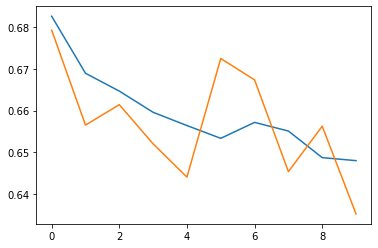

31/31 [==============================] - 1s 42ms/step - loss: 0.6438 - acc: 0.6331
loss= 0.6438061594963074
acc= 0.6330645084381104


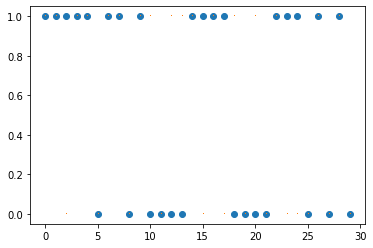

In [40]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Input

input_shape = (SEQUENCE_LENGTH, preprocessed.shape[-1])

model = keras.Sequential()
model.add(Input(input_shape))
# model.add(LSTM(128))
model.add(Bidirectional(LSTM(128)))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["acc"])
model.summary()

history = model.fit(train_data_generator, epochs=10, verbose=1, validation_data=valid_data_generator)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)


test_x, test_y = test_data_generator.get_all_data()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], ',')
plt.show()

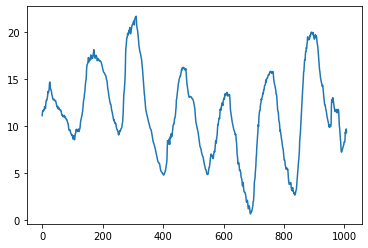

truth : 0, predicted : 1


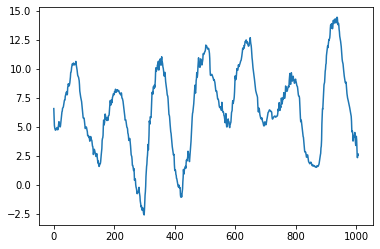

truth : 1, predicted : 1


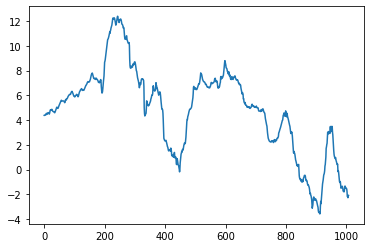

truth : 1, predicted : 0


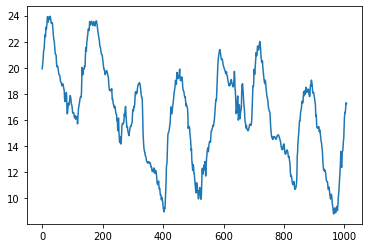

truth : 0, predicted : 1


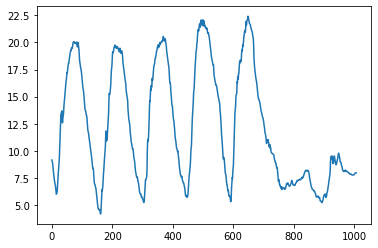

truth : 0, predicted : 1


In [41]:
I = TARGET_FEATURE_INDEX
features = batch_x * (maxs[I] - mins[I]) + mins[I]

for i in range(5):
  plt.plot(features[i,:,I])
  plt.show()
  print("truth : {}, predicted : {}".format(int(batch_y[i]), predicted[i]))

